## Deep CCA (DCCA)

In this example, we show how to used Deep CCA to uncover latent correlations between views.

In [1]:
from mvlearn.embed import DCCA

from mvlearn.datasets import GaussianMixture
from mvlearn.plotting import crossviews_plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Polynomial-Transformed Latent Correlation

Latent variables are sampled from two multivariate Gaussians with equal prior probability. Then a polynomial transformation is applied and noise is added independently to both the transformed and untransformed latents.

In [3]:
n_samples = 2000
centers = [[0,1], [0,-1]]
covariances = [np.eye(2), np.eye(2)]
GM = GaussianMixture(n_samples, centers, covariances, random_state=42,
                     shuffle=True, shuffle_random_state=42)
GM = GM.sample_views(transform='poly', n_noise=2)

The latent data is plotted against itself to reveal the underlying distribtution.

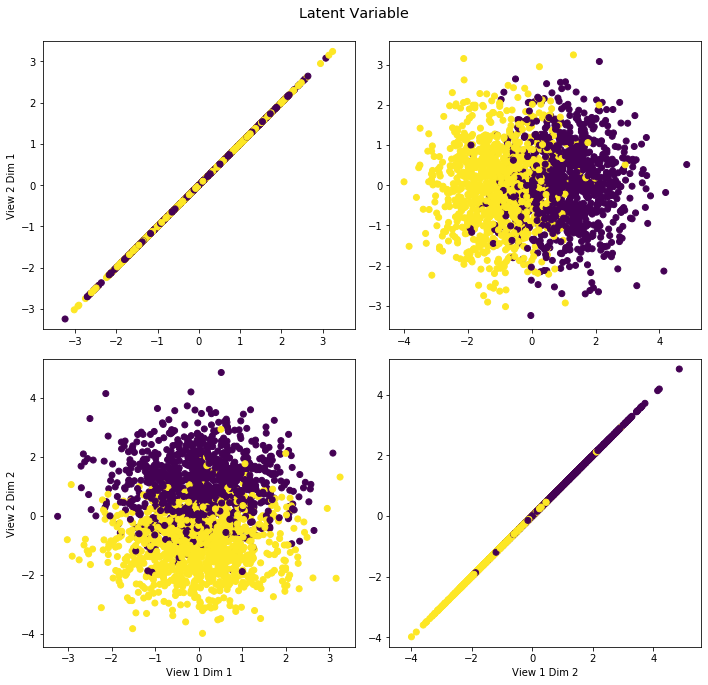

In [4]:
crossviews_plot([GM.latent, GM.latent], labels=GM.y, title='Latent Variable', equal_axes=True)

The noisy latent variable (view 1) is plotted against the transformed latent variable (view 2), an example of a dataset with two views.

In [5]:
# Split data into train and test segments
Xs_train = []
Xs_test = []
max_row = int(GM.Xs[0].shape[0] * .7)
Xs, y = GM.get_Xy(latents=False)
for X in Xs:
    Xs_train.append(X[:max_row, :])
    Xs_test.append(X[max_row:, :])
y_train = y[:max_row]
y_test = y[max_row:]

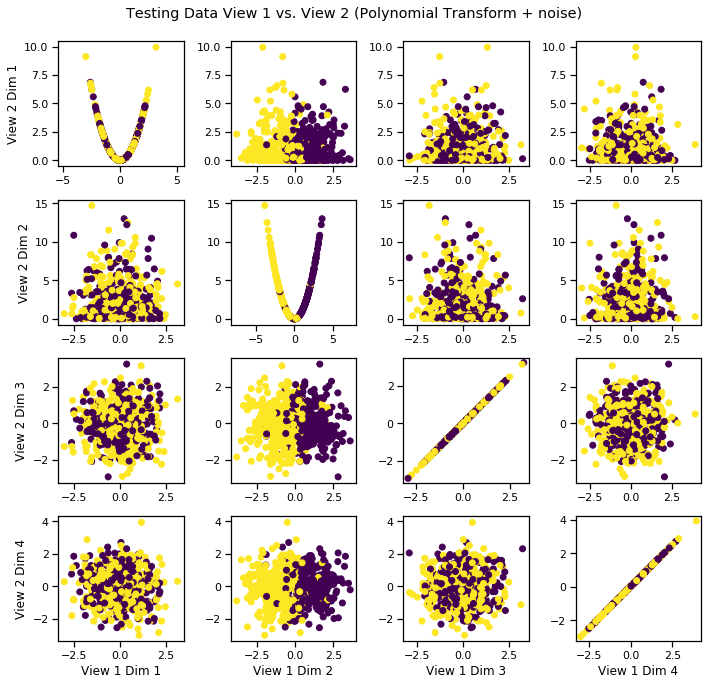

In [6]:
crossviews_plot(Xs_test, labels=y_test, title='Testing Data View 1 vs. View 2 (Polynomial Transform + noise)', equal_axes=True)

#### Fit DCCA model to uncover latent distribution

The output dimensionality is still 4.

In [7]:
# Define parameters and layers for deep model
features1 = Xs_train[0].shape[1] # Feature sizes
features2 = Xs_train[1].shape[1]
layers1 = [1024, 512, 4] # nodes in each hidden layer and the output size
layers2 = [1024, 512, 4]

dcca = DCCA(input_size1=features1, input_size2=features2, n_components=4,
            layer_sizes1=layers1, layer_sizes2=layers2)
dcca.fit(Xs_train)
Xs_transformed = dcca.transform(Xs_test)

#### Visualize the transformed data

We can see that it has uncovered the latent correlation between views.

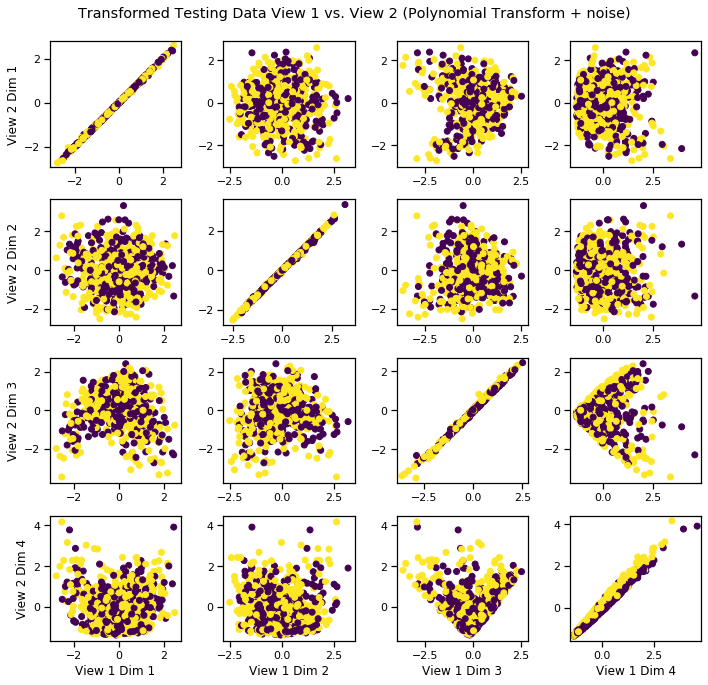

In [8]:
crossviews_plot(Xs_transformed, labels=y_test, title='Transformed Testing Data View 1 vs. View 2 (Polynomial Transform + noise)', equal_axes=True)

### Sinusoidal-Transformed Latent Correlation

Following the same procedure as above, latent variables are sampled from two multivariate Gaussians with equal prior probability. This time, a sinusoidal transformation is applied and noise is added independently to both the transformed and untransformed latents.

In [9]:
n = 2000
mu = [[0,1], [0,-1]]
sigma = [np.eye(2), np.eye(2)]
class_probs = [0.5, 0.5]
GM = GaussianMixture(mu,sigma,n,class_probs=class_probs, random_state=42,
                     shuffle=True, shuffle_random_state=42)
GM = GM.sample_views(transform='sin', n_noise=2)

In [10]:
# Split data into train and test segments
Xs_train = []
Xs_test = []
max_row = int(GM.Xs[0].shape[0] * .7)
for X in GM.Xs:
    Xs_train.append(X[:max_row, :])
    Xs_test.append(X[max_row:, :])
y_train = GM.y[:max_row]
y_test = GM.y[max_row:]

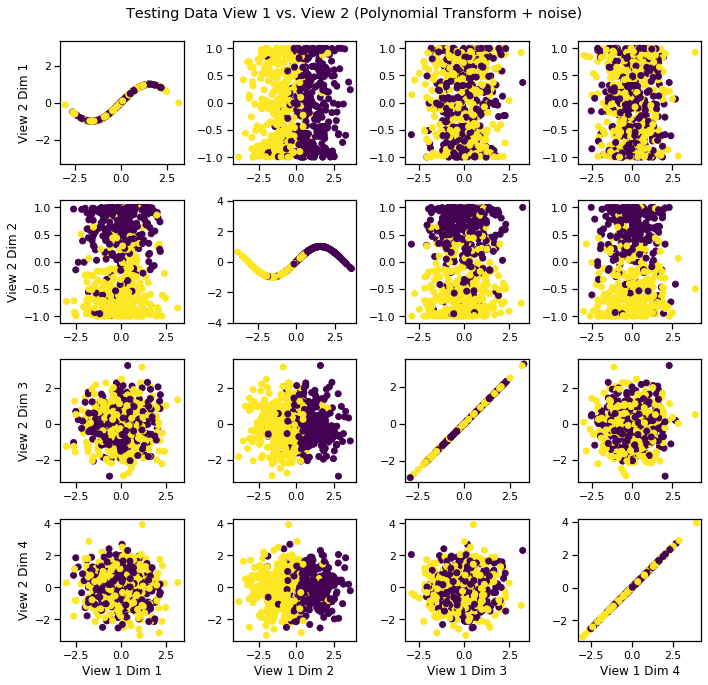

In [11]:
crossviews_plot(Xs_test, labels=y_test, title='Testing Data View 1 vs. View 2 (Polynomial Transform + noise)', equal_axes=True)

#### Fit DCCA model to uncover latent distribution

The output dimensionality is still 4.

In [12]:
# Define parameters and layers for deep model
features1 = Xs_train[0].shape[1] # Feature sizes
features2 = Xs_train[1].shape[1]
layers1 = [1024, 512, 4] # nodes in each hidden layer and the output size
layers2 = [1024, 512, 4]

dcca = DCCA(input_size1=features1, input_size2=features2, n_components=4,
            layer_sizes1=layers1, layer_sizes2=layers2)
dcca.fit(Xs_train)
Xs_transformed = dcca.transform(Xs_test)

#### Visualize the transformed data

We can see that it has uncovered the latent correlation between views.

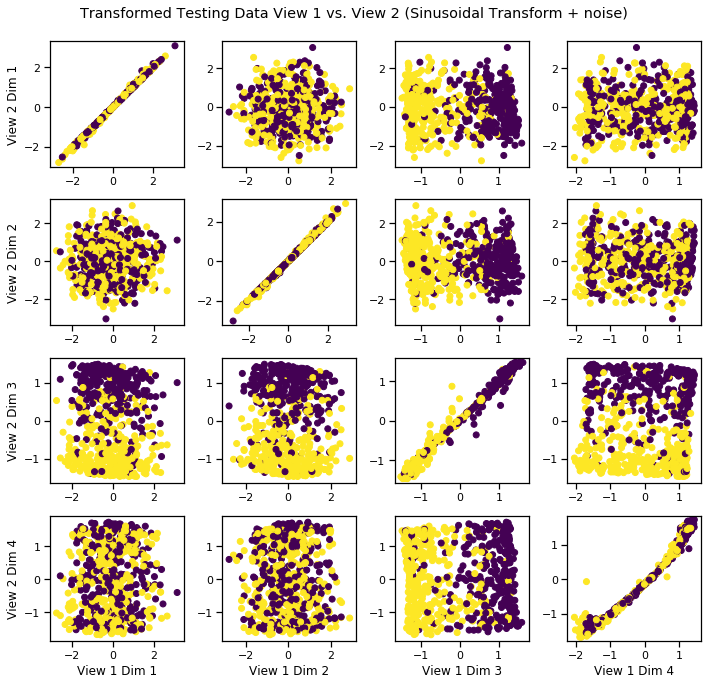

In [13]:
crossviews_plot(Xs_transformed, labels=y_test, title='Transformed Testing Data View 1 vs. View 2 (Sinusoidal Transform + noise)', equal_axes=True)